Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5267 - loss: 0.6941 - val_accuracy: 0.5885 - val_loss: 0.6691
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6456 - loss: 0.6453 - val_accuracy: 0.8177 - val_loss: 0.5491
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7831 - loss: 0.5247 - val_accuracy: 0.4792 - val_loss: 0.8690
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6855 - loss: 0.5856 - val_accuracy: 0.8385 - val_loss: 0.4464
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8453 - loss: 0.4238 - val_accuracy: 0.7708 - val_loss: 0.4241
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7226 - loss: 0.5093 - val_accuracy: 0.8333 - val_loss: 0.3884
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8373 - loss: 0.3786 - val_accuracy: 0.8125 - val_loss: 0.3850
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8406 - loss: 0.3721 - val_accuracy: 0.8646 - val_loss

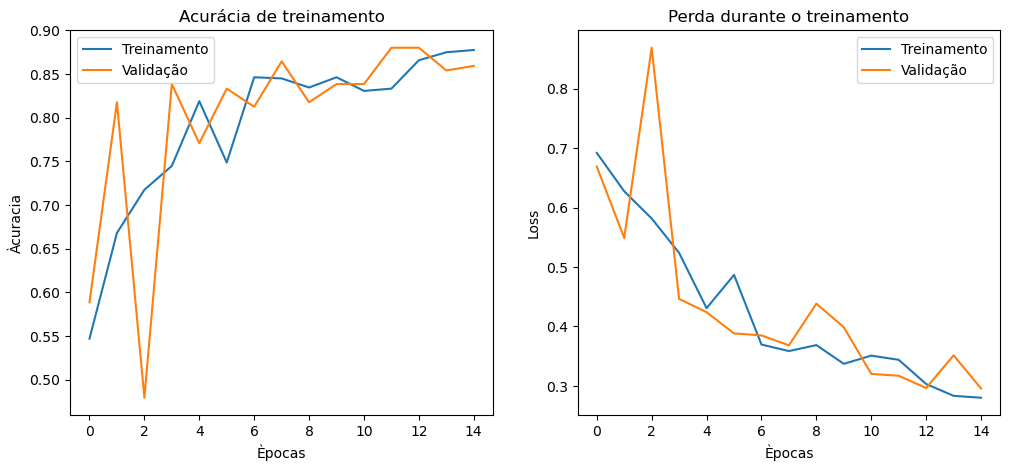

In [18]:
# importando as bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

# Simulação dos dados climaticos do norte 
num_samples = 1200  #Quantidade de amostras (dias)
sequence_lenght = 24 # C24 horas (sequencia de 24 leituras)
features = 3 # cada entrada tem 3 variaveis: velocidade, profundidade e viradas

X = np.random.rand(num_samples, sequence_lenght, features) # dados aleatorio representados (Entradas)

labels = (X[:, :, 1].mean(axis=1) > 0.5).astype(int) # Rótulo: se a umidade for  1 - normal(1), anômalo(0)

# Separação de grupo de teste e treino 
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=12)

model = Sequential() #Modelo sequencial 
model.add(SimpleRNN(40, input_shape=(sequence_lenght, features), activation='tanh')) 
# Camada de 32 neuronio usando as informações de enrtradas e função de ativação tanh (tangente hiperbolica)
model.add(Dense(1, activation='sigmoid')) # Camada de saída binário usando a função sigmoid

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# fit TREINO
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=36, #multiplos de 2 geralmente
                    validation_split=0.2,
                    verbose=1)
# print('-'*35)
# print('saida: ',Dense)
# print('-'*35)

# saida do modelo de treinamento 
plt.figure(figsize=(12,5))

# gráfico ocurária
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia de treinamento')
plt.xlabel('Èpocas')
plt.ylabel('Àcuracia')
plt.legend()

# gráfico da perda (loss)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Èpocas')
plt.ylabel('Loss')
plt.legend()

